### Building the dataset


In [1]:
import re

def extract_iopath_timing_from_sdf(sdf_file):
    """Extracts IOPATH delays from an SDF file"""
    delays = []
    pattern = r"\(IOPATH\s+(\S+)\s+(\S+)\s+\(([\d\.eE-]+)::([\d\.eE-]+)::([\d\.eE-]+)\)\)"

    with open(sdf_file, "r") as file:
        content = file.read()  # Read entire file

    matches = re.findall(pattern, content)  # Find all IOPATH delays

    print(f"Total IOPATH Matches Found: {len(matches)}")  # Debugging

    for match in matches:
        start_signal, end_signal, min_delay, typ_delay, max_delay = match
        min_delay = float(min_delay)  # Convert to float
        if min_delay > 0:  # Ignore zero delays
            delays.append((start_signal.strip(), end_signal.strip(), min_delay))

    return delays

# Run extraction
sdf_delays = extract_iopath_timing_from_sdf("xtea.sdf")

# Print first few extracted values
print(sdf_delays[:5] if sdf_delays else "No valid delays found!")

Total IOPATH Matches Found: 0
No valid delays found!


In [2]:
import re
import pandas as pd

def extract_iopath_timing_from_sdf(sdf_file):
    """Extracts IOPATH delays from an SDF file."""
    delays = []
    # Regex pattern to match IOPATH delays
    pattern = r"\(IOPATH\s+(\S+)\s+(\S+)\s+\(([\d\.eE-]+)::([\d\.eE-]+)\)\s+\(([\d\.eE-]+)::([\d\.eE-]+)\)\)"

    with open(sdf_file, "r") as file:
        content = file.read()  # Read entire file

    matches = re.findall(pattern, content)  # Find all IOPATH delays

    print(f"Total IOPATH Matches Found: {len(matches)}")  # Debugging

    for match in matches:
        start_signal, end_signal, rise_min, rise_max, fall_min, fall_max = match
        rise_min = float(rise_min)
        rise_max = float(rise_max)
        fall_min = float(fall_min)
        fall_max = float(fall_max)
        
        # Append extracted values to list
        delays.append((start_signal, end_signal, rise_min, rise_max, fall_min, fall_max))

    return delays

# Run extraction on your SDF file
sdf_delays = extract_iopath_timing_from_sdf("xtea.sdf")

# Convert to DataFrame
df = pd.DataFrame(sdf_delays, columns=["Start Signal", "End Signal", "Min Rise Delay", "Max Rise Delay", "Min Fall Delay", "Max Fall Delay"])

# Save to CSV
df.to_csv("xtea_iopath_delays.csv", index=False)

# Print first few extracted values
df.head()


Total IOPATH Matches Found: 6865


,Start Signal,End Signal,Min Rise Delay,Max Rise Delay,Min Fall Delay,Max Fall Delay
0,A,Y,0.056670,0.153227,0.032766,0.123846
1,A,Y,0.121497,0.321010,0.050633,0.181730
2,B,Y,0.099705,0.246548,0.036553,0.114375
3,A1,X,0.073416,0.265530,0.107525,0.334875
4,A2,X,0.067776,0.223311,0.108950,0.310580


In [3]:
import pandas as pd

# Load the extracted IOPATH delays dataset
df = pd.read_csv("xtea_iopath_delays.csv")

# Sort by Max Delay to find the critical paths
df_sorted = df.sort_values(by="Max Rise Delay", ascending=False)

# Select the top 10 most timing-critical paths
df_critical = df_sorted.head(10)

# Save the critical paths dataset
df_critical.to_csv("sdf_timing_critical_signals.csv", index=False)

# Display results
df_critical


,Start Signal,End Signal,Min Rise Delay,Max Rise Delay,Min Fall Delay,Max Fall Delay
6442,CLK,Q,0.390317,1.454669,0.408354,1.585800
6362,CLK,Q,0.384163,1.441512,0.404659,1.577839
6375,CLK,Q,0.382685,1.437956,0.403705,1.575216
6488,CLK,Q,0.382120,1.436330,0.401131,1.568803
6489,CLK,Q,0.373264,1.417482,0.396640,1.559409
6361,CLK,Q,0.372576,1.417351,0.395847,1.559096
6368,CLK,Q,0.371934,1.416074,0.395392,1.558194
6363,CLK,Q,0.371179,1.412496,0.395176,1.555603
6439,CLK,Q,0.369588,1.407926,0.393146,1.549857
6438,CLK,Q,0.360179,1.387913,0.386251,1.534803


In [4]:
# Assuming a typical gate delay of 0.1 ns
TYPICAL_GATE_DELAY = 0.1  # Adjust based on technology node

# Compute estimated combinational depth
df["Estimated Depth"] = df["Max Rise Delay"] / TYPICAL_GATE_DELAY

# Save updated dataset
df.to_csv("sdf_iopath_with_depth.csv", index=False)

# Show top results
df.head()


,Start Signal,End Signal,Min Rise Delay,Max Rise Delay,Min Fall Delay,Max Fall Delay,Estimated Depth
0,A,Y,0.056670,0.153227,0.032766,0.123846,1.532269
1,A,Y,0.121497,0.321010,0.050633,0.181730,3.210101
2,B,Y,0.099705,0.246548,0.036553,0.114375,2.465483
3,A1,X,0.073416,0.265530,0.107525,0.334875,2.655300
4,A2,X,0.067776,0.223311,0.108950,0.310580,2.233109


In [5]:
# Add Estimated Depth to DataFrame
df["Estimated Depth"] = df["Max Rise Delay"] / TYPICAL_GATE_DELAY

# Save final dataset
df.to_csv("sdf_final_timing_dataset.csv", index=False)

# Display results
df.head()


,Start Signal,End Signal,Min Rise Delay,Max Rise Delay,Min Fall Delay,Max Fall Delay,Estimated Depth
0,A,Y,0.056670,0.153227,0.032766,0.123846,1.532269
1,A,Y,0.121497,0.321010,0.050633,0.181730,3.210101
2,B,Y,0.099705,0.246548,0.036553,0.114375,2.465483
3,A1,X,0.073416,0.265530,0.107525,0.334875,2.655300
4,A2,X,0.067776,0.223311,0.108950,0.310580,2.233109


In [9]:
df_sdf = pd.read_csv("sdf_final_timing_dataset.csv")
df_fanin = pd.read_csv("fan_in_data.csv")
df_fanout = pd.read_csv("fan_out_data.csv")

# Check how many unique signals exist in each dataset
print("Unique SDF Signals:", len(df_sdf["Start Signal"].unique()))
print("Unique Fan-In Signals:", len(df_fanin["Signal"].unique()))
print("Unique Fan-Out Signals:", len(df_fanout["Signal"].unique()))

Unique SDF Signals: 22
Unique Fan-In Signals: 2950
Unique Fan-Out Signals: 720


In [10]:
print("SDF Signal Sample:", df_sdf["Start Signal"].unique()[:10])
print("Fan-In Signal Sample:", df_fanin["Signal"].unique()[:10])
print("Fan-Out Signal Sample:", df_fanout["Signal"].unique()[:10])

SDF Signal Sample: ['A' 'B' 'A1' 'A2' 'B1' 'A1_N' 'A2_N' 'B2' 'C_N' 'C1']
Fan-In Signal Sample: ['_0202_' '_1846_' '_1868_' '_1869_' '_0203_' '_1870_' '_1871_' '_1872_'
 '_0204_' '_1873_']
Fan-Out Signal Sample: ['_1868_' '_1869_' '_1870_' '_0205_' '_0206_' '_1875_' '_1876_' '_1878_'
 '_1883_' '_1884_']


In [11]:
import re

def extract_signal_mappings(verilog_file):
    """Extracts synthesized netlist signal mappings."""
    mappings = {}
    pattern = r"assign\s+(\S+)\s*=\s*(\S+);"  # Matches: assign _1385_ = A;

    with open(verilog_file, "r") as file:
        for line in file:
            match = re.search(pattern, line)
            if match:
                synthesized_signal, original_signal = match.groups()
                mappings[original_signal] = synthesized_signal  # Store mapping

    return mappings

# Run extraction
verilog_file_path = "xtea.synthesis_preroute.v"
signal_mappings = extract_signal_mappings(verilog_file_path)

# Print first few mappings
print(list(signal_mappings.items())[:10])


[]


In [12]:
import re

def extract_signal_mappings(verilog_file):
    """Extracts signal assignments from the synthesized netlist."""
    mappings = {}
    pattern = r"assign\s+(\S+)\s*=\s*(\S+);"  # Matches: assign _1385_ = A;

    with open(verilog_file, "r") as file:
        for line in file:
            match = re.search(pattern, line)
            if match:
                synthesized_signal, original_signal = match.groups()
                mappings[original_signal] = synthesized_signal  # Store mapping

    return mappings

# Run Extraction
verilog_file_path = "xtea.synthesis_preroute.v"
signal_mappings = extract_signal_mappings(verilog_file_path)

# Print first few mappings
print(list(signal_mappings.items())[:10])


[]


In [13]:
import re

def extract_signal_mappings_from_instances(verilog_file):
    """Extracts signal mappings from module instances in the synthesized netlist."""
    mappings = {}
    pattern = r"\.(\w+)\((\S+)\)"  # Matches instance connections like `.B1(_1684_)`

    with open(verilog_file, "r") as file:
        for line in file:
            match = re.findall(pattern, line)
            if match:
                for port, signal in match:
                    mappings[signal] = port  # Store mapping

    return mappings

# Run Extraction
verilog_file_path = "xtea.synthesis_preroute.v"
signal_mappings = extract_signal_mappings_from_instances(verilog_file_path)

# Save Mappings to CSV
import pandas as pd
df_mappings = pd.DataFrame(signal_mappings.items(), columns=["Synthesized Name", "Original Name"])
df_mappings.to_csv("signal_mappings.csv", index=False)

# Print first few mappings
print(df_mappings.head())


  Synthesized Name Original Name
0           _0115_            A1
1             VGND           VNB
2             VPWR           VPB
3            VPWR)          VPWR
4           _0164_            A1


In [14]:
import pandas as pd

# Load Fan-In and Fan-Out Data
df_fanin = pd.read_csv("fan_in_data.csv")
df_fanout = pd.read_csv("fan_out_data.csv")

# Load SDF Data (Without Mapped Names Yet)
df_sdf = pd.read_csv("sdf_final_timing_dataset.csv")

# Merge Fan-In and Fan-Out with SDF Data
df_sdf = df_sdf.merge(df_fanin, left_on="Start Signal", right_on="Signal", how="left")\
               .merge(df_fanout, left_on="Start Signal", right_on="Signal", how="left", suffixes=("_fanin", "_fanout"))

# Drop extra Signal columns
df_sdf.drop(columns=["Signal_fanin", "Signal_fanout"], inplace=True)

# Save Updated Dataset
df_sdf.to_csv("sdf_with_fanin_fanout.csv", index=False)

# Print first few rows
print(df_sdf.head())



  Start Signal End Signal  Min Rise Delay  Max Rise Delay  Min Fall Delay  \
0            A          Y        0.056670        0.153227        0.032766   
1            A          Y        0.121497        0.321010        0.050633   
2            B          Y        0.099705        0.246548        0.036553   
3           A1          X        0.073416        0.265530        0.107525   
4           A2          X        0.067776        0.223311        0.108950   

   Max Fall Delay  Estimated Depth  Fan-in  Fan-out  
0        0.123846         1.532269     NaN      NaN  
1        0.181730         3.210101     NaN      NaN  
2        0.114375         2.465483     NaN      NaN  
3        0.334875         2.655300     NaN      NaN  
4        0.310580         2.233109     NaN      NaN  


In [15]:
# Load Netlist Signal Mappings
df_mappings = pd.read_csv("signal_mappings.csv")

# Create a dictionary for fast lookup
signal_mapping_dict = dict(zip(df_mappings["Original Name"], df_mappings["Synthesized Name"]))

# Apply renaming to SDF
df_sdf["Mapped Start Signal"] = df_sdf["Start Signal"].map(signal_mapping_dict).fillna(df_sdf["Start Signal"])

# Save updated dataset
df_sdf.to_csv("sdf_mapped_signals.csv", index=False)

# Print first few rows
df_sdf.head()

,Start Signal,End Signal,Min Rise Delay,Max Rise Delay,Min Fall Delay,Max Fall Delay,Estimated Depth,Fan-in,Fan-out,Mapped Start Signal
0,A,Y,0.056670,0.153227,0.032766,0.123846,1.532269,NaN,NaN,key_in[15]
1,A,Y,0.121497,0.321010,0.050633,0.181730,3.210101,NaN,NaN,key_in[15]
2,B,Y,0.099705,0.246548,0.036553,0.114375,2.465483,NaN,NaN,_1780_
3,A1,X,0.073416,0.265530,0.107525,0.334875,2.655300,NaN,NaN,_1852_
4,A2,X,0.067776,0.223311,0.108950,0.310580,2.233109,NaN,NaN,_1841_


In [16]:
import pandas as pd

# Load the dataset
df_sdf = pd.read_csv("sdf_mapped_signals.csv")
df_fanin = pd.read_csv("fan_in_data.csv")
df_fanout = pd.read_csv("fan_out_data.csv")

# Find missing Fan-In and Fan-Out signals
missing_fanin = df_sdf[~df_sdf["Start Signal"].isin(df_fanin["Signal"])]
missing_fanout = df_sdf[~df_sdf["Start Signal"].isin(df_fanout["Signal"])]

print("Missing Fan-In Count:", len(missing_fanin))
print("Missing Fan-Out Count:", len(missing_fanout))

# Print a few samples of missing signals
print("Missing Fan-In Samples:\n", missing_fanin.head())
print("Missing Fan-Out Samples:\n", missing_fanout.head())



Missing Fan-In Count: 6865
Missing Fan-Out Count: 6865
Missing Fan-In Samples:
   Start Signal End Signal  Min Rise Delay  Max Rise Delay  Min Fall Delay  \
0            A          Y        0.056670        0.153227        0.032766   
1            A          Y        0.121497        0.321010        0.050633   
2            B          Y        0.099705        0.246548        0.036553   
3           A1          X        0.073416        0.265530        0.107525   
4           A2          X        0.067776        0.223311        0.108950   

   Max Fall Delay  Estimated Depth  Fan-in  Fan-out Mapped Start Signal  
0        0.123846         1.532269     NaN      NaN          key_in[15]  
1        0.181730         3.210101     NaN      NaN          key_in[15]  
2        0.114375         2.465483     NaN      NaN              _1780_  
3        0.334875         2.655300     NaN      NaN              _1852_  
4        0.310580         2.233109     NaN      NaN              _1841_  
Missing Fan-O

In [17]:
import pandas as pd

# Load the mapping file (sdf_mapped_signals.csv)
df_mapping = pd.read_csv("sdf_mapped_signals.csv")
print("Mapping file columns:", df_mapping.columns)
print("Mapping file sample:")
print(df_mapping.head())

# Load the fan-in data (fan_in_data_corrected_with_debug.csv)
df_fanin = pd.read_csv("fan_in_data_corrected_with_debug.csv")
print("Fan-In data columns:", df_fanin.columns)
print("Fan-In data sample:")
print(df_fanin.head())

# Standardize the keys by stripping whitespace and converting to lower-case
df_mapping["Mapped Start Signal"] = df_mapping["Mapped Start Signal"].str.strip().str.lower()
df_fanin["Signal"] = df_fanin["Signal"].str.strip().str.lower()

# Merge the two datasets on the synthesized net names
df_merged = pd.merge(
    df_fanin,
    df_mapping,
    left_on="Signal",
    right_on="Mapped Start Signal",
    how="inner"
)

print("Merged dataset sample:")
print(df_merged.head())

# Optionally, save the merged dataset to a CSV file
df_merged.to_csv("merged_timing_and_fanin.csv", index=False)
print("Merged dataset saved as merged_timing_and_fanin.csv")


Mapping file columns: Index(['Start Signal', 'End Signal', 'Min Rise Delay', 'Max Rise Delay',
       'Min Fall Delay', 'Max Fall Delay', 'Estimated Depth', 'Fan-in',
       'Fan-out', 'Mapped Start Signal'],
      dtype='object')
Mapping file sample:
  Start Signal End Signal  Min Rise Delay  Max Rise Delay  Min Fall Delay  \
0            A          Y        0.056670        0.153227        0.032766   
1            A          Y        0.121497        0.321010        0.050633   
2            B          Y        0.099705        0.246548        0.036553   
3           A1          X        0.073416        0.265530        0.107525   
4           A2          X        0.067776        0.223311        0.108950   

   Max Fall Delay  Estimated Depth  Fan-in  Fan-out Mapped Start Signal  
0        0.123846         1.532269     NaN      NaN          key_in[15]  
1        0.181730         3.210101     NaN      NaN          key_in[15]  
2        0.114375         2.465483     NaN      NaN            

In [18]:
import pandas as pd

# Load the mapping file (sdf_mapped_signals.csv)
df_mapping = pd.read_csv("sdf_mapped_signals.csv")
print("Mapping file columns:", df_mapping.columns)
print("Mapping file sample:")
print(df_mapping.head())

# Load the fan-in data (fan_in_data_corrected_with_debug.csv)
df_fanin = pd.read_csv("fan_in_data_corrected_with_debug.csv")
print("Fan-In data columns:", df_fanin.columns)
print("Fan-In data sample:")
print(df_fanin.head())

# Standardize the keys by stripping whitespace and converting to lower-case
df_mapping["Mapped Start Signal"] = df_mapping["Mapped Start Signal"].str.strip().str.lower()
df_fanin["Signal"] = df_fanin["Signal"].str.strip().str.lower()

# Merge the two datasets on the synthesized net names
df_merged = pd.merge(
    df_fanin,
    df_mapping,
    left_on="Signal",
    right_on="Mapped Start Signal",
    how="inner"
)

print("Merged dataset sample:")
print(df_merged.head())

# Optionally, save the merged dataset to a CSV file
df_merged.to_csv("merged_timing_and_fanin1.csv", index=False)
print("Merged dataset saved as merged_timing_and_fanin.csv")


Mapping file columns: Index(['Start Signal', 'End Signal', 'Min Rise Delay', 'Max Rise Delay',
       'Min Fall Delay', 'Max Fall Delay', 'Estimated Depth',
       'Mapped Start Signal'],
      dtype='object')
Mapping file sample:
  Start Signal End Signal  Min Rise Delay  Max Rise Delay  Min Fall Delay  \
0            A          Y        0.056670        0.153227        0.032766   
1            A          Y        0.121497        0.321010        0.050633   
2            B          Y        0.099705        0.246548        0.036553   
3           A1          X        0.073416        0.265530        0.107525   
4           A2          X        0.067776        0.223311        0.108950   

   Max Fall Delay  Estimated Depth Mapped Start Signal  
0        0.123846         1.532269          key_in[15]  
1        0.181730         3.210101          key_in[15]  
2        0.114375         2.465483              _1780_  
3        0.334875         2.655300              _1852_  
4        0.310580    

            Fan-in  Min Rise Delay  Max Rise Delay  Min Fall Delay  \
count  6385.000000     6385.000000     6385.000000     6385.000000   
mean      3.771496        0.114205        0.361670        0.135745   
std       6.681362        0.044325        0.127230        0.061613   
min       1.000000        0.025478        0.069372        0.013002   
25%       1.000000        0.082558        0.280984        0.096663   
50%       2.000000        0.107369        0.347759        0.137794   
75%       3.000000        0.136435        0.426594        0.173822   
max      32.000000        0.484815        1.167956        0.440713   

       Max Fall Delay  Estimated Depth  
count     6385.000000      6385.000000  
mean         0.490270         3.616703  
std          0.246256         1.272299  
min          0.070003         0.693722  
25%          0.313709         2.809837  
50%          0.456216         3.477590  
75%          0.653968         4.265943  
max          1.818441        11.679557  


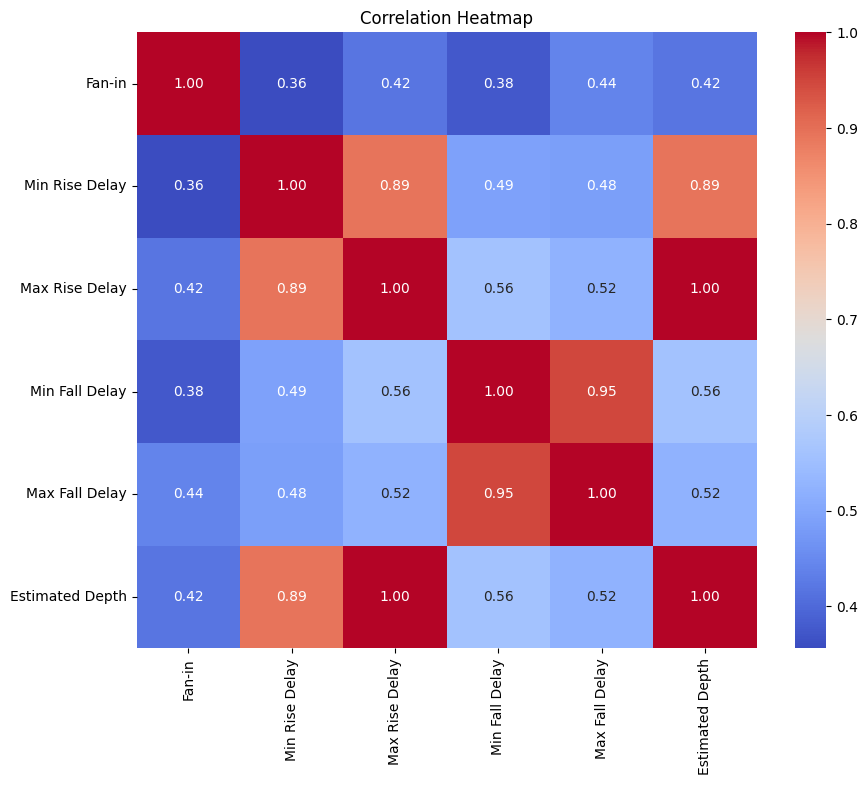

In [19]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load merged dataset
df_merged = pd.read_csv("merged_timing_and_fanin.csv")

# Display summary statistics
print(df_merged.describe())

# Check for missing values
print("Missing values:\n", df_merged.isnull().sum())

# Plot a correlation heatmap (selecting numeric columns)
numeric_cols = df_merged.select_dtypes(include=["float64", "int64"]).columns
plt.figure(figsize=(10, 8))
sns.heatmap(df_merged[numeric_cols].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Suppose we want to predict "Estimated Depth" from our merged dataset
# (adjust the target as needed based on your available columns)
target = "Estimated Depth"

# Prepare features (drop columns that are not numeric or not needed)
# You may need to adjust this based on your actual column names
feature_columns = [col for col in df_merged.columns if col not in [target, "Start Signal", "End Signal", "Mapped Start Signal", "Signal"]]

X = df_merged[feature_columns]
y = df_merged[target]

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest Regressor
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions and evaluate the model
y_pred = model.predict(X_test)
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
print("Root Mean Squared Error:", mean_squared_error(y_test, y_pred, squared=False))
print("R² Score:", r2_score(y_test, y_pred))


Mean Absolute Error: 0.0011836958459275672
Root Mean Squared Error: 0.006338140425753497
R² Score: 0.9999759852846244


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [21]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Split data into train/test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Train a baseline Random Forest model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Evaluate on test set
y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

print("=== Baseline Model Performance ===")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R² Score: {r2}")


=== Baseline Model Performance ===
Mean Absolute Error (MAE): 0.0011836958459275672
Root Mean Squared Error (RMSE): 0.006338140425753497
R² Score: 0.9999759852846244


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [23]:
import numpy as np

In [24]:
from sklearn.model_selection import KFold, cross_val_score

kf = KFold(n_splits=5, shuffle=True, random_state=42)

# We'll evaluate the model using negative mean_squared_error, so we convert it later
scores = cross_val_score(
    model, X, y,
    scoring="neg_mean_squared_error",
    cv=kf,
    n_jobs=-1
)

mse_scores = -scores  # Convert negative MSE to positive
rmse_scores = np.sqrt(mse_scores)

print("=== Cross-Validation Results (5-Fold) ===")
print(f"MSE scores: {mse_scores}")
print(f"RMSE scores: {rmse_scores}")
print(f"Mean RMSE: {rmse_scores.mean():.4f} | Std Dev: {rmse_scores.std():.4f}")


=== Cross-Validation Results (5-Fold) ===
MSE scores: [3.69034869e-05 3.21699613e-05 6.40074425e-05 3.55722247e-04
 2.23905033e-03]
RMSE scores: [0.00607482 0.00567186 0.00800047 0.0188606  0.0473186 ]
Mean RMSE: 0.0172 | Std Dev: 0.0158


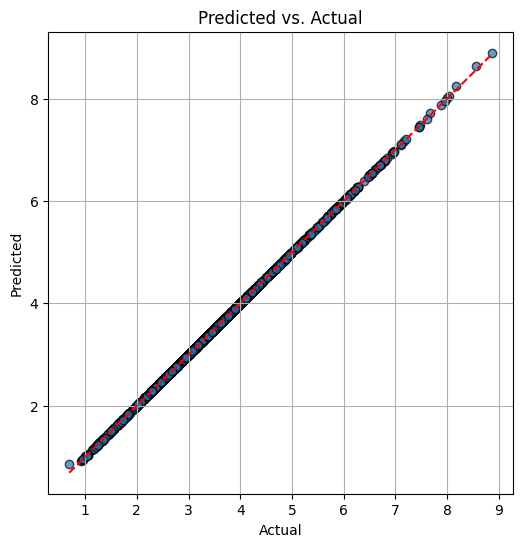

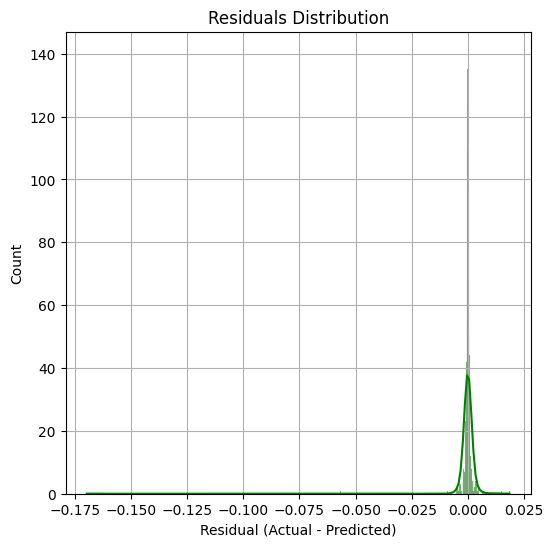

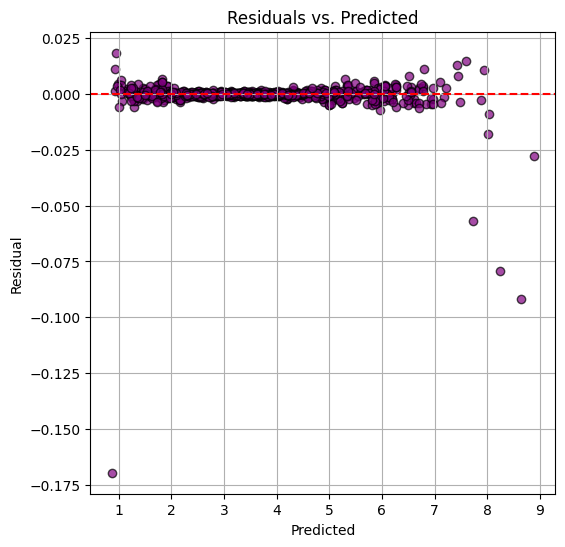

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate residuals on the test set
residuals = y_test - y_pred

# 1. Scatter plot of Predicted vs. Actual
plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_pred, alpha=0.7, edgecolor="k")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], "r--")
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Predicted vs. Actual")
plt.grid(True)
plt.show()

# 2. Residuals Distribution
plt.figure(figsize=(6, 6))
sns.histplot(residuals, kde=True, color="green")
plt.title("Residuals Distribution")
plt.xlabel("Residual (Actual - Predicted)")
plt.grid(True)
plt.show()

# 3. Residuals vs. Predicted
plt.figure(figsize=(6, 6))
plt.scatter(y_pred, residuals, alpha=0.7, edgecolor="k", color="purple")
plt.axhline(0, color="red", linestyle="--")
plt.xlabel("Predicted")
plt.ylabel("Residual")
plt.title("Residuals vs. Predicted")
plt.grid(True)
plt.show()


In [26]:
import joblib

# Save the trained model
joblib.dump(model, "optimized_logic_depth_model.pkl")

['optimized_logic_depth_model.pkl']

In [27]:
from fastapi import FastAPI
import joblib
import pandas as pd
from pydantic import BaseModel

# Load the optimized model
model = joblib.load("optimized_logic_depth_model.pkl")

# Create a FastAPI app instance
app = FastAPI()

# Define the request model
class PredictionRequest(BaseModel):
    # Define your feature fields here based on your training data
    area: float
    delay_per_area: float
    area_per_depth: float
    # Add additional features as needed

@app.post("/predict")
def predict_logic_depth(data: PredictionRequest):
    # Convert input data to DataFrame (make sure feature order matches your training data)
    input_data = pd.DataFrame([data.dict()])
    # Predict using the model
    prediction = model.predict(input_data)
    return {"predicted_delay": float(prediction[0])}

# To run the API: uvicorn api:app --reload


In [28]:
import joblib
import pandas as pd

# Load the model
model = joblib.load("optimized_logic_depth_model.pkl")

# Create a DataFrame for new data (adjust feature names as needed)
new_data = pd.DataFrame({
    "area": [150],
    "delay_per_area": [0.5],
    "area_per_depth": [10]
})

# Predict
prediction = model.predict(new_data)
print("Predicted delay:", prediction[0])

ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- area
- area_per_depth
- delay_per_area
Feature names seen at fit time, yet now missing:
- Fan-in
- Max Fall Delay
- Max Rise Delay
- Min Fall Delay
- Min Rise Delay


In [29]:
print("Training features:", X_train.columns.tolist())

Training features: ['Fan-in', 'Min Rise Delay', 'Max Rise Delay', 'Min Fall Delay', 'Max Fall Delay']
